<a href="https://colab.research.google.com/github/HamdanXI/nlp_adventure/blob/main/gsrc/dataset_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download en_core_web_sm

In [2]:
import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt

In [ ]:
def load_text_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.read().splitlines()
    return pd.DataFrame(lines, columns=['text'])

In [20]:
asl_data_path = 'corpus_0008.clean.asl.txt'
text_data_path = 'corpus_0008.clean.en.txt'

asl_df = load_text_file(asl_data_path)
text_df = load_text_file(text_data_path)

asl_df.columns = ['gloss']
df = pd.concat([text_df, asl_df], axis=1)

print(df.head())

In [27]:
# Some 'text' sentences are of type float
# float_rows = df[df['text'].apply(lambda x: isinstance(x, float))]
# print(float_rows)

# Convert all float values in 'text' to strings, turning NaN into empty strings
df['text'] = df['text'].apply(lambda x: '' if pd.isnull(x) else str(x))

## Difference Between Gloss Count and Text Count

In [29]:
df['text_count'] = df['text'].apply(lambda x: len(x.split()))
df['gloss_count'] = df['gloss'].apply(lambda x: len(x.split()))

print(df.head())

                                                text  \
0            Will you join in that historic effort ?   
1  In the long history of the world , only a few ...   
2  I do not believe that any of us would exchange...   
3  The energy , the faith , the devotion which we...   
4  And so , my fellow Americans . . .ask not what...   

                                               gloss  text_count  gloss_count  
0             Will you join in that historic effort            8            7  
1   In the long history of the world only a few g...          40           35  
2   PRO-1 do not believe that any of us would exc...          20           19  
3   The energy the faith the devotion which we br...          37           32  
4   And so my fellow Americans ask not what your ...          28           22  


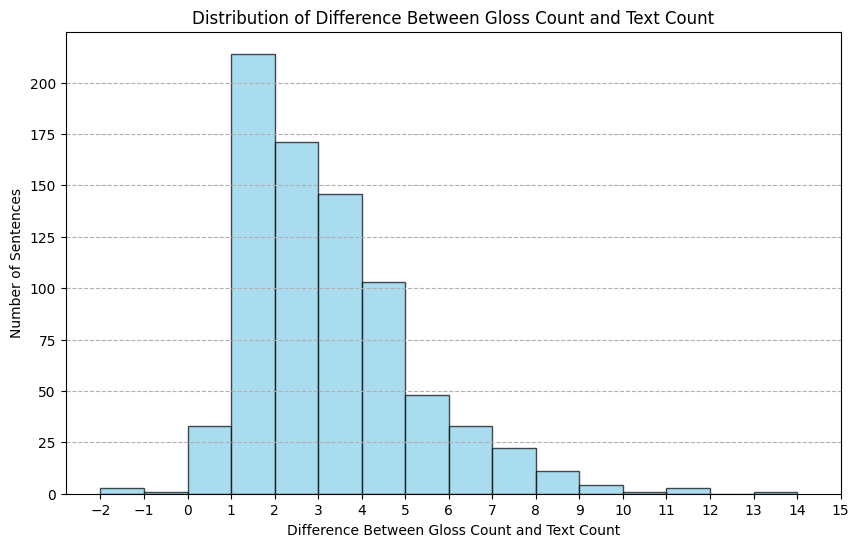

In [35]:
df['count_difference'] = df['text_count'] - df['gloss_count']

average_difference = df['count_difference'].mean()

plt.figure(figsize=(10, 6))
plt.hist(df['count_difference'], bins=range(int(min(df['count_difference'])), int(max(df['count_difference'])) + 1, 1), alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Difference Between Gloss Count and Text Count')
plt.ylabel('Number of Sentences')
plt.title('Distribution of Difference Between Gloss Count and Text Count')
plt.xticks(range(int(min(df['count_difference'])), int(max(df['count_difference'])) + 2, 1))
plt.grid(axis='y', linestyle='--')

plt.show()

In [37]:
sentences_diff_minus_1 = df[df['count_difference'] == -1]

print("Sentences with a count difference of -1:")
for index, row in sentences_diff_minus_1.iterrows():
    print(f"Row {index}: {row['text']}")
    print(f"Row {index}: {row['gloss']}")

Sentences with a count difference of -1:
Row 792: FOR PUBLIC DOMAIN EBOOKS * Ver.02 / 11 / 02 * END *
Row 792:  FOR PUBLIC DOMAIN EBOOKS * Ver 02 / 11 / 02 * END *


In [39]:
sentences_diff_minus_2 = df[df['count_difference'] == -2]

print("Sentences with a count difference of -2:")
for index, row in sentences_diff_minus_2.iterrows():
    print(f"Row {index}: {row['text']}")
    print(f"Row {index}: {row['gloss']}")

Sentences with a count difference of -2:
Row 704: This file should be named const11.txt or const11.zip Corrected EDITIONS of our eBooks get a new NUMBER , const12.txt VERSIONS based on separate sources get new LETTER , const11a.txt
Row 704:  This file should be named const11 txt or const11 zip Corrected EDITIONS of our eBooks get a new NUMBER const12 txt VERSIONS based on separate sources get new LETTER const11a txt
Row 716: http : / / www.ibiblio.org / gutenberg / etext05 or ftp : / / ftp.ibiblio.org / pub / docs / books / gutenberg / etext05
Row 716:  http / / www ibiblio org / gutenberg / etext05 or ftp / / ftp ibiblio org / pub / docs / books / gutenberg / etext05
Row 745: http : / / www.gutenberg.net / donation.html
Row 745:  http / / www gutenberg net / donation html


## Comparing Text and Gloss Complexity

In [49]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

def analyze_complexity(text):
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    num_tokens = len(doc)
    pos_counts = Counter(token.pos_ for token in doc)
    return num_sentences, num_tokens, dict(pos_counts)

In [50]:
df['text_complexity'] = df['text'].apply(analyze_complexity)
df['gloss_complexity'] = df['gloss'].apply(analyze_complexity)

In [52]:
text_complexity_columns = df['text_complexity'].apply(pd.Series)
text_complexity_columns.columns = ['text_num_sentences', 'text_num_tokens', 'text_pos_counts']

gloss_complexity_columns = df['gloss_complexity'].apply(pd.Series)
gloss_complexity_columns.columns = ['gloss_num_sentences', 'gloss_num_tokens', 'gloss_pos_counts']

df = pd.concat([df, text_complexity_columns, gloss_complexity_columns], axis=1)

df.drop(['text_complexity', 'gloss_complexity'], axis=1, inplace=True)

In [56]:
# print(df.head())

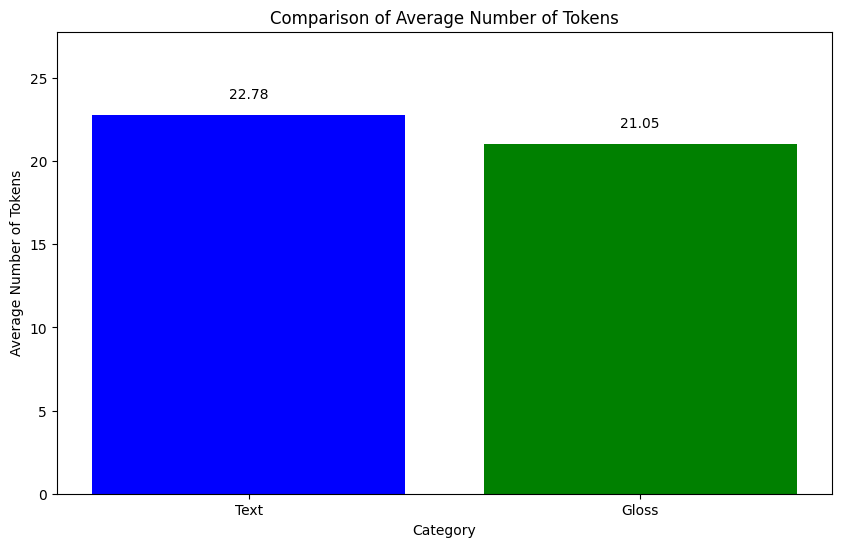

In [58]:
average_text_tokens = df['text_num_tokens'].mean()
average_gloss_tokens = df['gloss_num_tokens'].mean()

categories = ['Text', 'Gloss']
averages = [average_text_tokens, average_gloss_tokens]

plt.figure(figsize=(10, 6))
plt.bar(categories, averages, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('Average Number of Tokens')
plt.title('Comparison of Average Number of Tokens')
plt.xticks(categories)
plt.ylim(0, max(averages) + 5)

for i, value in enumerate(averages):
    plt.text(i, value + 1, f"{value:.2f}", ha='center')

plt.show()

In [60]:
# print(df.head())

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Aggregating POS counts
text_pos_aggregate = defaultdict(int)
gloss_pos_aggregate = defaultdict(int)

for row in df.itertuples():
    for pos, count in row.text_pos_counts.items():
        text_pos_aggregate[pos] += count
    for pos, count in row.gloss_pos_counts.items():
        gloss_pos_aggregate[pos] += count

pos_comparison_df = pd.DataFrame([text_pos_aggregate, gloss_pos_aggregate], index=['Text', 'Gloss']).T

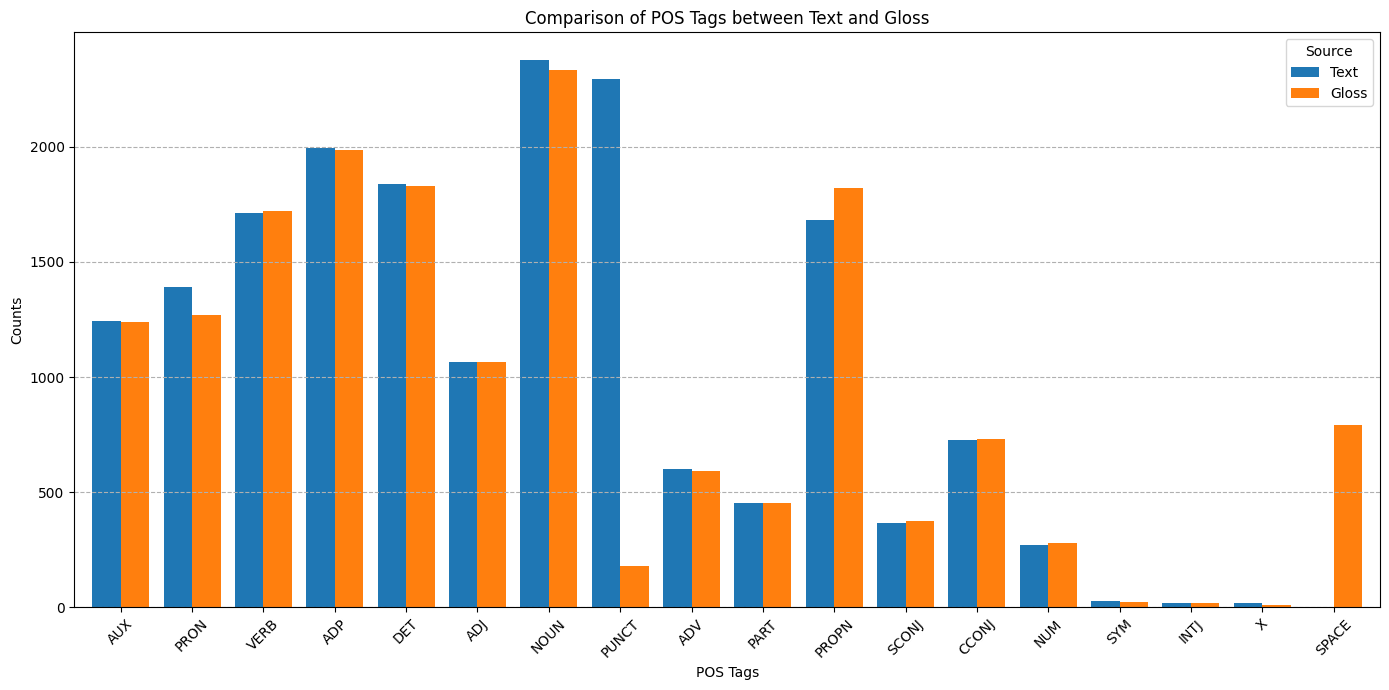

In [62]:
pos_comparison_df.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title('Comparison of POS Tags between Text and Gloss')
plt.xlabel('POS Tags')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()